In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

### Summary of findings (some of which is not shown)

We employ here an optimized but simple Logistic Regression, fitting a 2nd order polynomial function to the feature matrix and employing k fold cross validation. "-phi" features were dropped because they show uniform densities for both the signal and the background entries, it will not help us discern between the two. It also lessens the computing time. The accuracy score improved from ~0.75 to ~0.82 when a 2nd order polynomial was fitted, but going higher that degree = 2 became extremely straining for the code. The C parameter, or the regularization strength, for the LogisticRegression model was optimized. We found higher accuracy scores for higher C, which could be expectedd because C, by definition, is the inverse of lambda (hyperparameter).

Also, log transforming the columns with long tails does not give significant results.

Using only the DER-_ features, only lessens the accuracy score. In a design matrix with only the mass features (where signal and background distributions seems to differ from each other), higher degrees of the polynomial features function can be executed, and gives only a max accuracy score of 0.794064 at degree = 4. 

# Preliminary Logistic Regression

In [2]:
# dataset
higgs = pd.read_csv('mean_data.csv')

# divide by test and train
train = higgs[higgs['KaggleSet'] == 't' ]
test = higgs[higgs['KaggleSet'] == 'b' ]
data = pd.concat((train,test))

In [27]:
# cleaning imputed data for logistic regression
# we further drop all the phi variables because as established, they increase overfitting because they feature 
# uniform densities for the signal and background
train_label = train['Label']
test_label = test['Label']
todrop = ['Weight','Label','KaggleSet','KaggleWeight', 'PRI_jet_leading_phi', 'PRI_jet_subleading_phi', 'PRI_met_phi', 'PRI_lep_phi', 'PRI_tau_phi' ]
X_train = train.drop(todrop, axis = 1)
X_test = test.drop(todrop, axis = 1)

# making a design matrix of higher order
degree = 2
poly = PolynomialFeatures(degree)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

# scaling data
scaler = StandardScaler() #MinMaxScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:,0] = 1
X_test_scaled[:,0] = 1

## optimizing C parameter

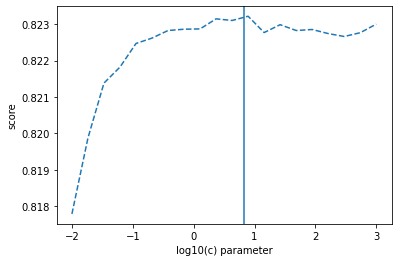

In [4]:
# shorter cross validation + logistic regression fr different C, regularizatio strength
fold = 5
C_param_range = np.logspace(-2,3,20)
c_scores = np.zeros(len(C_param_range))

j = 0
for c in C_param_range:
    kfold = KFold(n_splits = fold, random_state = 10, shuffle = True)
    model = LogisticRegression(random_state = 10, C = c, solver = 'lbfgs', max_iter = 100, penalty = 'l2')
    model.fit(X_train_scaled, train_label)
    y_pred = cross_val_predict(model, X_train_scaled, train_label, cv= kfold)
    c_scores[j] = accuracy_score(train_label, y_pred)
    j+= 1

# saved accuracy score data from previous run
#C_param_range = np.logspace(-2,3,20)
#acc_score = [0.817788, 0.819872, 0.82138, 0.82182, 0.822468, 0.822616, 0.822824, 0.82286, 0.822868, 0.823144, 0.8231, 0.823216, 0.822768, 0.822984, 0.822824, 0.822852, 0.82274, 0.82266, 0.822764, 0.823]
#c_scores = np.array(acc_score)

# plots
plt.plot(np.log10(C_param_range),c_scores, '--')
plt.xlabel('log10(c) parameter')
plt.ylabel('score')
plt.axvline(max(c_scores))

### score of test and train dataset

/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterati

/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterati

Text(0, 0.5, 'score')

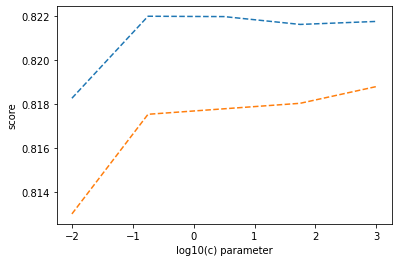

In [6]:
fold = 5
C_param_range = np.logspace(-2,3,5)
c_scores = np.zeros(len(C_param_range))
c_scores_test = np.zeros(len(C_param_range))

j = 0
for c in C_param_range:
    kfold = KFold(n_splits = fold, random_state = 10, shuffle = True)
    model = LogisticRegression(random_state = 10, C = c, solver = 'lbfgs', max_iter = 100, penalty = 'l2')
    model.fit(X_train_scaled, train_label)
    y_pred = cross_val_predict(model, X_train_scaled, train_label, cv= kfold)
    y_pred_test = cross_val_predict(model, X_test_scaled, test_label, cv= kfold)
    c_scores[j] = accuracy_score(train_label, y_pred)
    c_scores_test[j] = accuracy_score(test_label, y_pred_test)
    j+= 1
    
plt.plot(np.log10(C_param_range),c_scores, '--', label = 'train')
plt.plot(np.log10(C_param_range),c_scores_test, '--', label = 'test')
plt.xlabel('log10(c) parameter')
plt.ylabel('score')
#plt.axvline(max(c_scores))

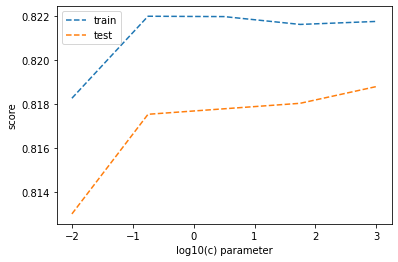

In [7]:
plt.plot(np.log10(C_param_range),c_scores, '--', label = 'train')
plt.plot(np.log10(C_param_range),c_scores_test, '--', label = 'test')
plt.xlabel('log10(c) parameter')
plt.ylabel('score')
plt.legend()

### using best C value

In [28]:
# using best regularization strength
fold = 5
c = 7.85 # best value
kfold = KFold(n_splits = fold, random_state = 10, shuffle = True)
model = LogisticRegression(random_state = 10, C = c, solver = 'lbfgs', max_iter = 100, penalty = 'l2')
model.fit(X_train_scaled, train_label)
y_pred = model.predict(X_train_scaled)
score = cross_val_score(model, X_train_scaled, train_label, cv= kfold)
c_scores = accuracy_score(train_label, np.array(y_pred))

print('accuracy score:', c_scores)
print('validation scores', score)
#plt.plot(np.log10(C_param_range),c_scores)

/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterati

accuracy score: 0.823288
validation scores [0.8181  0.82408 0.8207  0.8226  0.8235 ]


# Using only _mass_ columns
To demonstrate if there is also overfitting when using higher degree polynomialfeatures fit. The output show decreasing score, therefore overfitting, however has this weird behavior where the test and train score are almost the same. We write this off with the conclusion that degree in PolynomialFeatures() fit in this case is irrelevant.

how many s in train pred 65350
how many s in test pred 26057
how many s in train pred 66414
how many s in test pred 26707


/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


how many s in train pred 68826
how many s in test pred 27827


/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


how many s in train pred 29917
how many s in test pred 11991


/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


how many s in train pred 13
how many s in test pred 9


/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


how many s in train pred 119745
how many s in test pred 47672


/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


how many s in train pred 36496
how many s in test pred 14390


/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


how many s in train pred 117148
how many s in test pred 46825
how many s in train pred 0
how many s in test pred 0
how many s in train pred 0
how many s in test pred 0
how many s in train pred 0
how many s in test pred 0
Accuracy score (train) [0.700364 0.772004 0.781892 0.735336 0.65732  0.519968 0.631852 0.444036
 0.657332 0.657332 0.657332]
Accuracy score (test) [0.70234 0.77266 0.7816  0.73768 0.6597  0.51827 0.63217 0.44332 0.65975
 0.65975 0.65975]


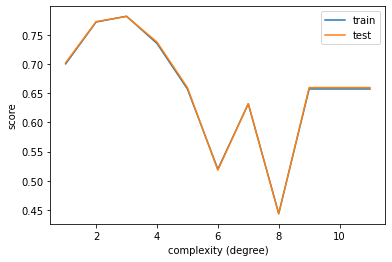

In [29]:
# dataset
higgs = pd.read_csv('mean_data.csv')
c = 7.85
# divide by test and train
train = higgs[higgs['KaggleSet'] == 't' ]
test = higgs[higgs['KaggleSet'] == 'b' ]
data = pd.concat((train,test))
y_train = train['Label']
y_test = test['Label']

X_train = train[['DER_mass_MMC' , 'DER_mass_transverse_met_lep', 'DER_mass_vis']]
X_test = test[['DER_mass_MMC' , 'DER_mass_transverse_met_lep', 'DER_mass_vis']]

# scaling
scaler = StandardScaler() #MinMaxScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# X_train_scaled[:,0] = 1
# X_test_scaled[:,0] = 1

## polynomial features
# only use for limited features
model = LogisticRegression(random_state = 10, C = c, solver = 'lbfgs', max_iter = 100, penalty = 'l2')
degree = [i for i in range(1,12)]
trainscore = np.zeros(len(degree))
testscore = np.zeros(len(degree))

j = 0
for deg in degree:
    poly = PolynomialFeatures(deg)
    X_train_scaled_ = poly.fit_transform(X_train_scaled)
    X_test_scaled_ = poly.transform(X_test_scaled)
    
    ## model building 
    model.fit(X_train_scaled_, y_train)
    y_pred = model.predict(X_train_scaled_)
    y_pred_test = model.predict(X_test_scaled_)
    print('how many s in train pred',list(y_pred).count('s'))
    print('how many s in test pred',list(y_pred_test).count('s'))
    trainscore[j] = accuracy_score(y_train, y_pred)
    testscore[j] = accuracy_score(y_test, y_pred_test)
    j += 1
    


print('Accuracy score (train)', trainscore)
print('Accuracy score (test)', testscore)
plt.plot(degree, trainscore, label = 'train')
plt.plot(degree, testscore, label = 'test')
plt.ylabel('score')
plt.xlabel('complexity (degree)')
plt.legend()

Conclusion: changing the design matrix to one with fewer features (even cherry picked features that seem to differntiate 's' and 'b' well does not give further improvement to the model. In fact, increasing the complexity of the polynomial fit overfits the data (even for two different solvers).

* note on solvers: 'saga' is supposedly faster. In our case, it is, but it shows lower accuracy scores.

# Comparing model on differently imputed datasets

In [2]:
datas = ['mean_data.csv', 'most_frequent_data.csv', 'zero_data.csv']
fold = 5
c = 7.85 # best value
kfold = KFold(n_splits = fold, random_state = 10, shuffle = True)
model = LogisticRegression(random_state = 10, C = c, solver = 'lbfgs', max_iter = 100, penalty = 'l2')

for dat in datas:
    # dataset
    higgs = pd.read_csv(dat)
    train = higgs[higgs['KaggleSet'] == 't' ]
    test = higgs[higgs['KaggleSet'] == 'b' ]
    data = pd.concat((train,test))

    train_label = train['Label']
    test_label = test['Label']
    todrop = ['Weight','Label','KaggleSet','KaggleWeight', 'PRI_jet_leading_phi', 'PRI_jet_subleading_phi', 'PRI_met_phi', 'PRI_lep_phi', 'PRI_tau_phi' ]
    X_train = train.drop(todrop, axis = 1)
    X_test = test.drop(todrop, axis = 1)
    degree = 2
    poly = PolynomialFeatures(degree)
    X_train = poly.fit_transform(X_train)
    X_test = poly.transform(X_test)
    scaler = StandardScaler() #MinMaxScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled[:,0] = 1
    X_test_scaled[:,0] = 1
    
    # model
    model.fit(X_train_scaled, train_label)
    y_pred = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    #score = cross_val_score(model, X_train_scaled, train_label, cv= kfold)

    c_scores = accuracy_score(train_label, np.array(y_pred))
    c_scores_test = accuracy_score(test_label, np.array(y_pred_test))

    print('accuracy score (train):', 'for {}'.format(dat), c_scores)
    print('accuracy score (test):', 'for {}'.format(dat), c_scores_test)
    #print('validation scores (train)', 'for {}'.format(dat),  score)
    

/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


accuracy score (train): for mean_data.csv 0.823288
accuracy score (test): for mean_data.csv 0.81015


/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


accuracy score (train): for most_frequent_data.csv 0.822736
accuracy score (test): for most_frequent_data.csv 0.8052


/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


accuracy score (train): for zero_data.csv 0.823332
accuracy score (test): for zero_data.csv 0.78511


Conclusion: the way to handle the missing values data seem to not matter that much with regards to agguracy score of the applied. Nonetheless, the zero imputed data is the one the gives the relatively better accuracy score.

# Dividing dataset by jet number

In [8]:
c = 7.85
higgs = pd.read_csv('most_frequent_data.csv')
jet_nums = [0, 1, 2, 3]
train_score = np.zeros(len(jet_nums))
test_score = np.zeros(len(jet_nums))
model = LogisticRegression(random_state = 10, C = c, solver = 'saga', max_iter = 100, penalty = 'l1')
j = 0
for jet in jet_nums:
    train1 = higgs[higgs['KaggleSet'] == 't']
    train = train1[train1['PRI_jet_num'] == jet]
    test1 = higgs[higgs['KaggleSet'] == 'b']
    test = test1[test1['PRI_jet_num'] == jet]
    data = pd.concat((train,test))
    y_train = train['Label']
    y_test = test['Label']
    
    # feature matrix for each value of jet_num
    if jet == 0:
        todrop = ['Weight','Label','KaggleSet','KaggleWeight', 'PRI_jet_num', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_lep_eta_centrality', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi'] 
    elif jet == 1:
        todrop = ['Weight','Label','KaggleSet','KaggleWeight', 'PRI_jet_num', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_lep_eta_centrality', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi']
    else:
        todrop = ['Weight','Label','KaggleSet','KaggleWeight', 'PRI_jet_num'] 
    
    X_train = train.drop(todrop, axis = 1).set_index('EventId')
    X_test = test.drop(todrop, axis = 1).set_index('EventId')
    scaler = StandardScaler() #MinMaxScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled[:,0] = 1
    X_test_scaled[:,0] = 1
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    train_score[j] = accuracy_score(y_train, y_pred)
    test_score[j] = accuracy_score(y_test, y_pred_test)
    print('Score of (train) dataset', 'jet num = {}:'.format(jet) ,accuracy_score(y_train, y_pred))
    print('Score of (test) dataset', 'jet num = {}:'.format(jet) ,accuracy_score(y_test, y_pred_test))

/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Score of (train) dataset jet num = 0: 0.8260786884589593
Score of (test) dataset jet num = 0: 0.8227971018101238
Score of (train) dataset jet num = 1: 0.712292375941401
Score of (test) dataset jet num = 1: 0.7126433048618103
Score of (train) dataset jet num = 2: 0.7401099664542766
Score of (test) dataset jet num = 2: 0.7372939899338794
Score of (train) dataset jet num = 3: 0.7305991698249413
Score of (test) dataset jet num = 3: 0.7287015945330296


/home/carlisle/.local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


We make a confusion matrix using jet = 3 dataset and the most_frequent.csv

# Final Confusion Matrix and Cumulative gain curve

(see definitions of confusion matrix and cumulative gain curve in decisiontree analysis)

Uses "most_frequent.csv" and jet = 3 from last run in previous kernel. 

<AxesSubplot:>

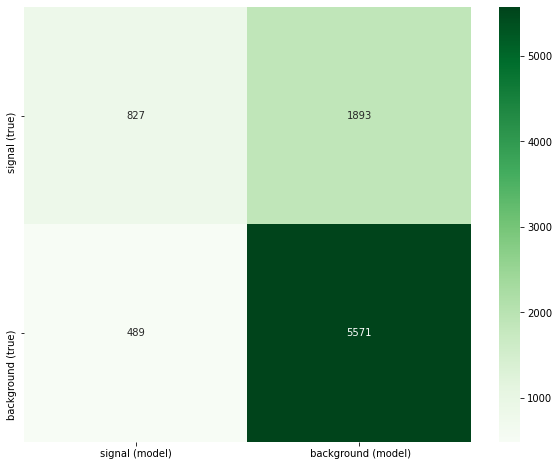

In [10]:
confmat = confusion_matrix(y_test, y_pred_test, labels = ['s','b'])
cm = pd.DataFrame(confmat,
                  index = ['signal (true)' , 'background (true)'], 
                  columns = ['signal (model)', ' background (model)'])
cm
plt.figure(figsize=[10,8])
sns.heatmap(cm, cmap='Greens', linecolor = 'black', annot = True, fmt='d')

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

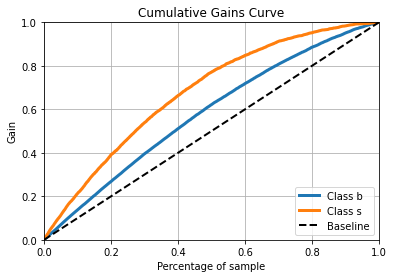

In [15]:
import scikitplot as skplt
y_probas = model.predict_proba(X_test_scaled)
skplt.metrics.plot_cumulative_gain(y_test, y_probas)